### Impoting the basic libraries 

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Importing the Datasets

In [2]:
#### Importing the training dataset
train_data =pd.read_excel(r'C:\Users\DELL\Downloads\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

#### Importing the testing dataset
test_data =pd.read_excel(r'C:\Users\DELL\Downloads\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [3]:
### Checking the train dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
### Checking the train dataset
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### First I start with train dataset

In [5]:
### Checking the dataset
train_data.shape

(10683, 11)

In [6]:
### Checking the null values in the dataset.
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### There only two column has null value and only two value. So, I will drop this null values, as both column has different values.

In [7]:
### Dropping the null values
train_data.dropna(inplace=True)

In [8]:
### Again checking the the null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Null values is filled.

In [9]:
### Removing the dupicate 
train_data.duplicated().sum()

220

In [10]:
### There are 220 duplicates in the dataset. I will drop these duplicates.
train_data.drop_duplicates(inplace=True)

In [11]:
### Checking the datatype 
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### The columns has object values, I will change these objects into integers after the checking the counting from count plot

### Data Cleaning is done. Now proceed toward the EDA. 

## EDA

In [12]:
### Importing the basic libraries 
import matplotlib.pyplot as plt
import seaborn as sns

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:xlabel='Airline', ylabel='count'>

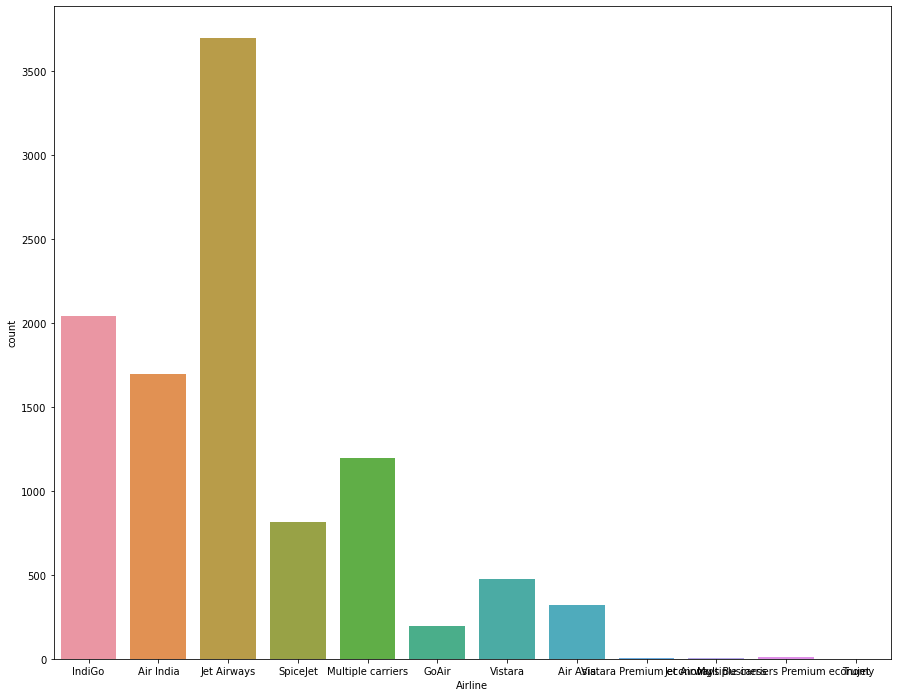

In [13]:
print(train_data['Airline'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='Airline', data=train_data)

#### Jet Airways has more flights compared to other flights.

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='count'>

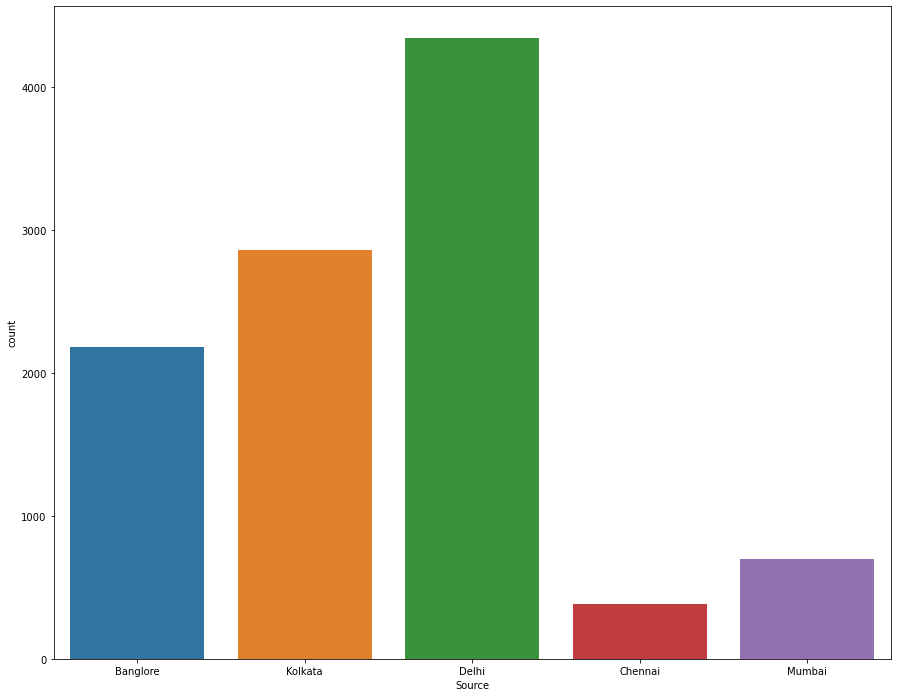

In [14]:
print(train_data['Source'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='Source', data=train_data)

### Most of flights are from Delhi.

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

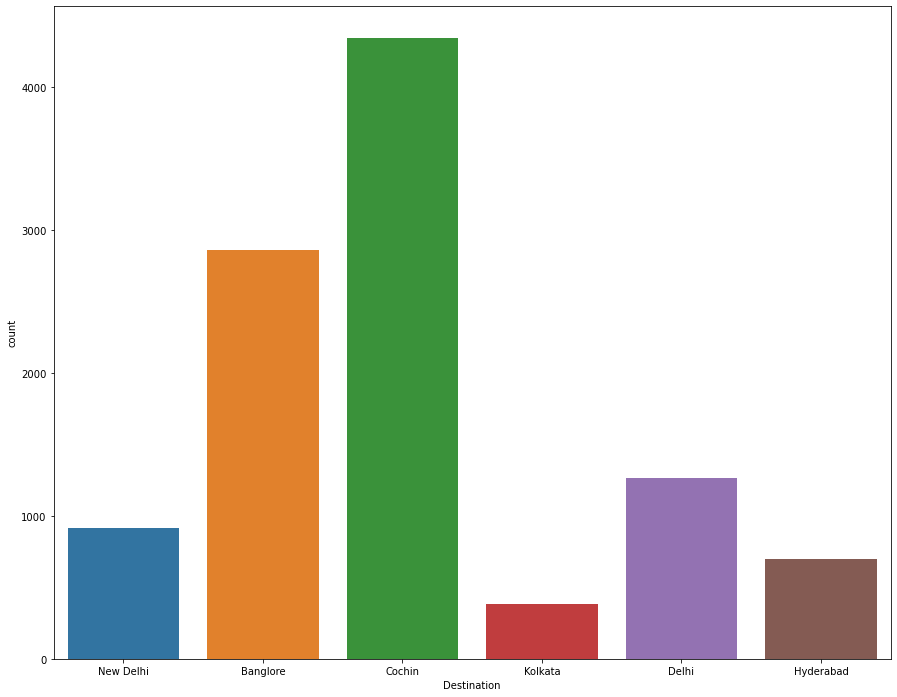

In [15]:
print(train_data['Destination'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='Destination', data=train_data)

### Destination is cochin are more frequent flisght compared to others.

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

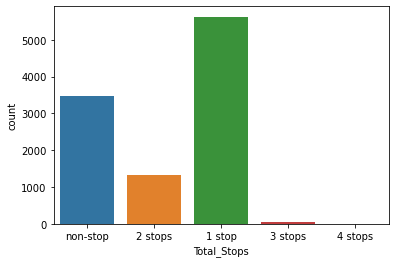

In [16]:
print(train_data['Total_Stops'].value_counts())
sns.countplot(x='Total_Stops', data=train_data)

### Most of flight with 1 stops and non-stop flights.

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64


<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

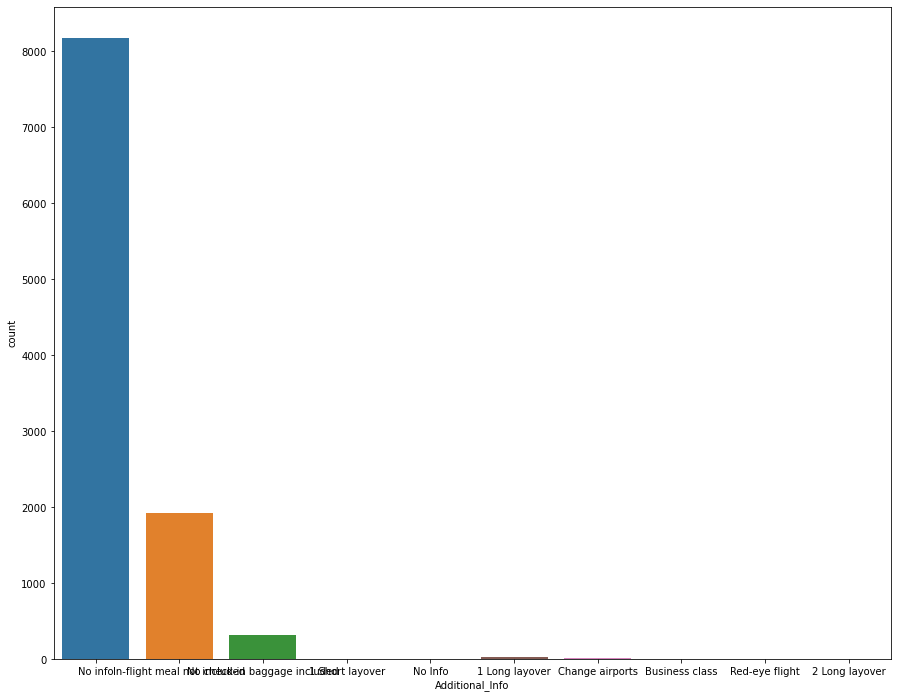

In [17]:
print(train_data['Additional_Info'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='Additional_Info', data=train_data)

### More than 70% filght dose not has any additional infomartions

### Approx 50% features has continuous valuse. So we will see the relation with target with Scatterplot but first we convert the object values with integers and move forward.

In [18]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
col=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']
train_data[col]= train_data[col].apply(le.fit_transform)

In [19]:
train_data.dtypes

Airline            int32
Date_of_Journey    int32
Source             int32
Destination        int32
Route              int32
Dep_Time           int32
Arrival_Time       int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
Price              int64
dtype: object

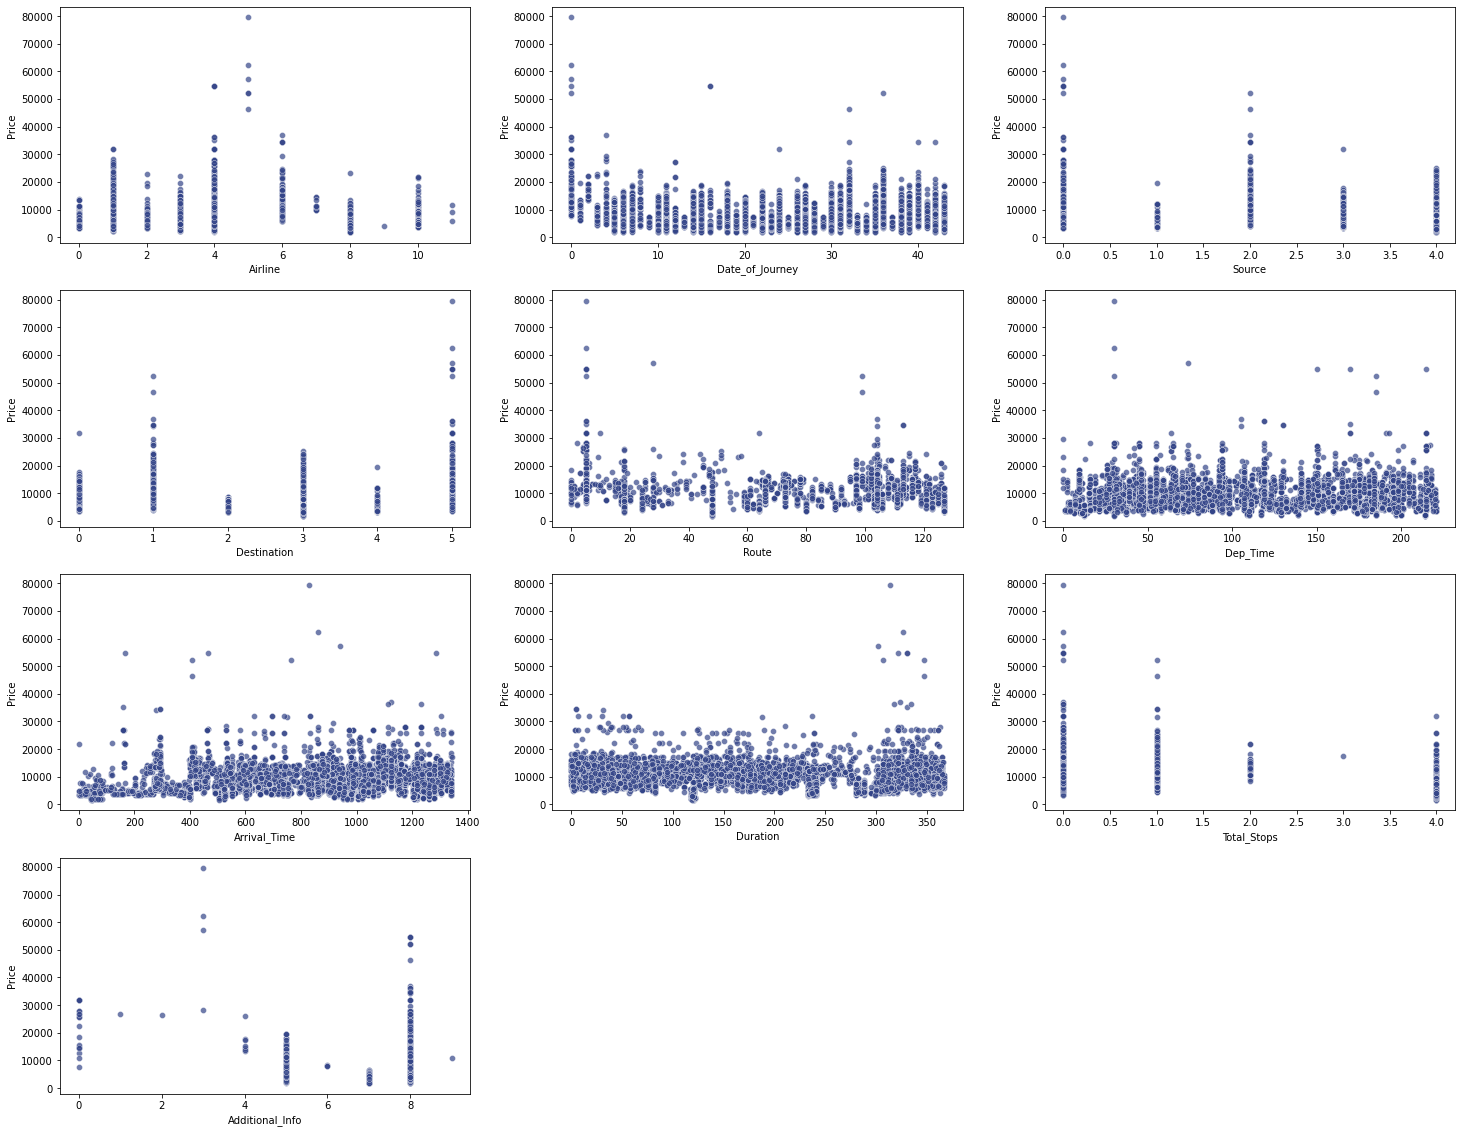

In [20]:
#### Plotting scatterplot to check the trend between features and target
x=train_data.drop(columns='Price')
y=train_data['Price']
plt.figure(figsize=(25,20))
pn=1
for column in x:
    if pn <= 12:
        plt.subplot(4,3, pn)
        sns.scatterplot(x[column],y, alpha=0.7, color="#334488")
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

In [21]:
x.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

## Conclusion -

#### Airline has good trend with price but there some airlines price are more comparison to othere may be they outliers will check in the boxplot.
#### Airline has good trend with price, starting date of months has more price compare to other.
#### Source has noremal trend with price.
#### Destination also has good trend with price.
#### Route has mixed trend with price .
#### Dep_Time has mixed trend price.
#### Arrival_Time normal trend with price.
#### Duration has good trend with price.
#### Total_Stops has good trend with price.
#### Additional_Info has normal trend with price.

### I can say from above conclusion that all the feature are directly related to price.. 

## Multicolinearity

<function matplotlib.pyplot.show(close=None, block=None)>

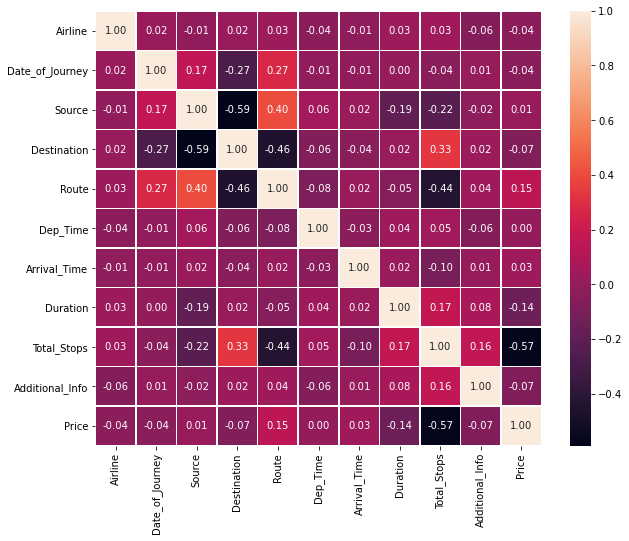

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### Conclusion - No feature has Multicolinearity with each other expect route and source which is only 40% and it is acceptable. No need to do any feature engineering. Already there are very less fature to build model.

### Feature with maximum realtion with traget - Route(15%)
### Feature with minimum realtion with traget - Dep_time(0%)

### As the target has very less trend with other feature. So, I am not going to drop any feature continue with all features.

## Checking the stats.

<function matplotlib.pyplot.show(close=None, block=None)>

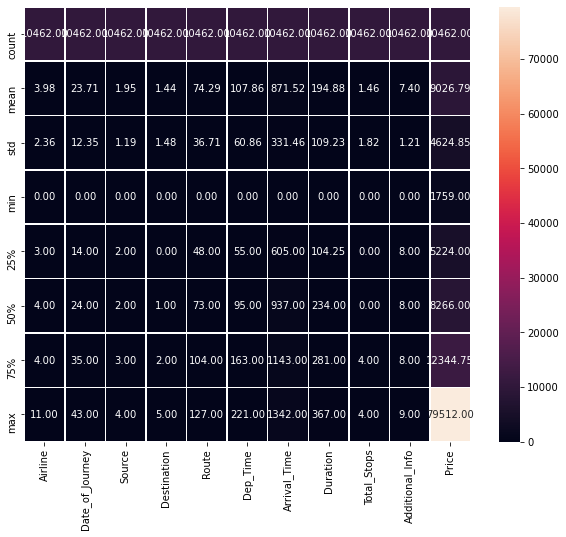

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.describe(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

In [24]:
train_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.981074,23.706270,1.953642,1.439495,74.286465,107.857389,871.516632,194.880711,1.463105,7.396483,9026.790289
std,2.364627,12.353794,1.186327,1.481015,36.707488,60.860574,331.460785,109.234632,1.821371,1.212030,4624.849541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,605.000000,104.250000,0.000000,8.000000,5224.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,95.000000,937.000000,234.000000,0.000000,8.000000,8266.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,163.000000,1143.000000,281.000000,4.000000,8.000000,12344.750000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


### All stats seems to be normal. 

### Now proceeding with distplot to check the distribution and skewness.

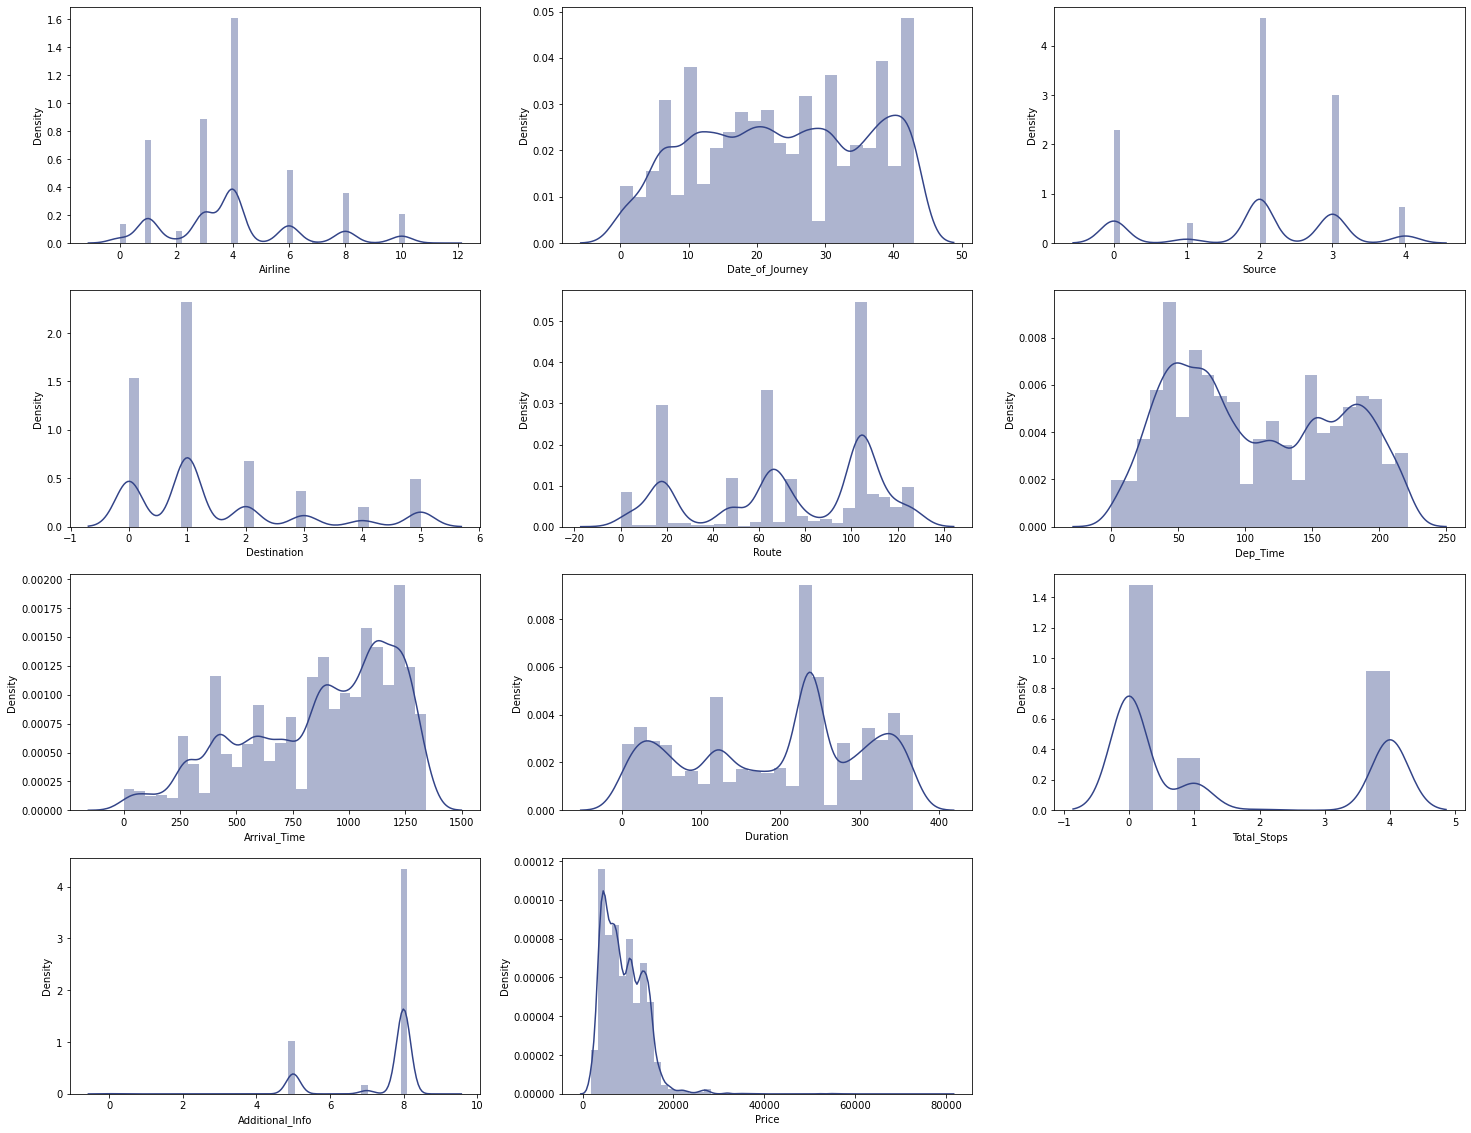

In [25]:
#### Plotting Distplot to check the distribution of the values
plt.figure(figsize=(25,20))
pn=1
for column in train_data:
    if pn <= 12:
        plt.subplot(4,3, pn)
        sns.distplot(train_data[column], color="#334488")
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### Most of the features are categorical values and price column has some right skewness. 

### Now Checking the skewness.

In [26]:
x.skew()

Airline            0.723567
Date_of_Journey   -0.067985
Source            -0.419669
Destination        1.225081
Route             -0.481865
Dep_Time           0.193997
Arrival_Time      -0.617521
Duration          -0.227148
Total_Stops        0.617105
Additional_Info   -1.796501
dtype: float64

### Only three feature has skeness and all three feature has categorical values. So, I will not remove this skewness.

### Checking outliers

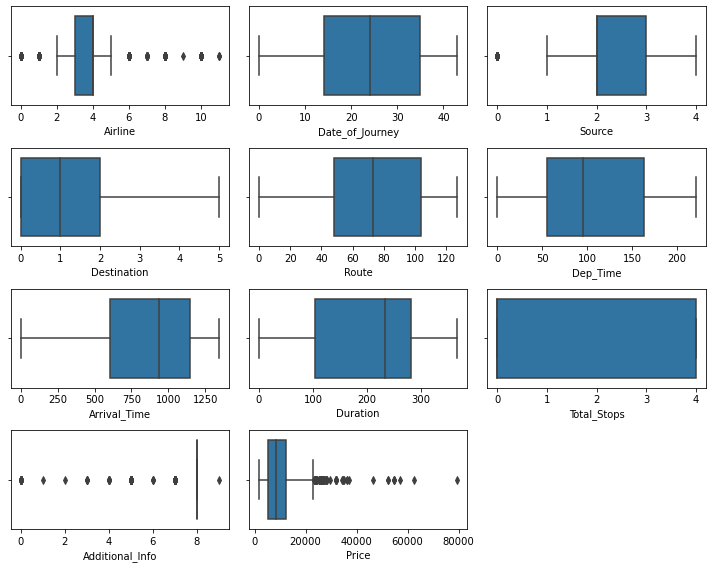

In [27]:
plt.figure(figsize=(10,8))
pn = 1
for column in train_data:
    if pn <= 12:
        ax = plt.subplot(4,3, pn)
        sns.boxplot(train_data[column])
        plt.xlabel(column, fontsize=10)
    pn+=1
plt.tight_layout()

### Only four columns has outliers and we will remove these outliers.

In [28]:
train_data.shape

(10462, 11)

In [29]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(train_data))
threshold = 3
np.where(z<3)

(array([    0,     0,     0, ..., 10461, 10461, 10461], dtype=int64),
 array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))

In [30]:
df_new = train_data[(z<3).all(axis=1)]
df_new.shape

(10357, 11)

In [31]:
### Dataloss
data_loss= (10462-10357)/10462*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 1.003632192697381


### Spliting the features and target.

In [32]:
x= df_new.drop(columns="Price")
y=df_new["Price"]

In [33]:
### Scaling the features with standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [34]:
#### Splitting the dataset into traing data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

8285 8285 2072 2072


In [35]:
### Importing the libraries for model building.
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [36]:
### Importing the LinearRegression and checking the r2 score, cross validation and errors
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Corss_lr = scr.mean()
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("\t\t\t LinearRegression Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for LinearRegression model', r2_lr*100, '\n Cross Validation score ', Corss_lr*100, '\nMean_absolute_error', mae_lr,"\nMean_squared_error", mse_lr, '\nRoot mean_squared_error', rmse_lr )

			 LinearRegression Model Accuracy and r2 score, cross validation and errors 

R2 score for LinearRegression model 40.16040053452603 
 Cross Validation score  40.416529592092985 
Mean_absolute_error 2531.282935438005 
Mean_squared_error 10331120.762939451 
Root mean_squared_error 3214.2060859471117


In [37]:
### Importing the GradientBoostingRegressor and checking the r2 score, cross validation and errors
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
r2_gbr =r2_score(y_test,pred_gbr)
scr = cross_val_score(gbr, x,y, cv=5)
Corss_gbr = scr.mean()
mae_gbr = mean_absolute_error(y_test,pred_gbr)
mse_gbr= mean_squared_error(y_test,pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print("\t\t\t GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for GradientBoostingRegressor model', r2_gbr*100, '\n Cross Validation score ', Corss_gbr*100, '\nMean_absolute_error', mae_gbr,"\nMean_squared_error", mse_gbr, '\nRoot mean_squared_error', rmse_gbr )

			 GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for GradientBoostingRegressor model 83.50299903212598 
 Cross Validation score  82.62487151729705 
Mean_absolute_error 1216.2678719499108 
Mean_squared_error 2848155.9159461115 
Root mean_squared_error 1687.6480426754008


In [38]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)
scr = cross_val_score(KNN, x_scaled,y, cv=5)
Corss_KNN = scr.mean()
mae_KNN = mean_absolute_error(y_test,pred_KNN)
mse_KNN = mean_squared_error(y_test,pred_KNN)
rmse_KNN = np.sqrt(mse_KNN)

print("\t\t\t KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100, '\n Cross Validation score ', Corss_KNN*100, '\nMean_absolute_error', mae_KNN,"\nMean_squared_error", mse_KNN, '\nRoot mean_squared_error', rmse_KNN)

			 KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for KNeighborsRegressor model 77.304794502076 
 Cross Validation score  74.80132064608246 
Mean_absolute_error 1316.4000965250966 
Mean_squared_error 3918256.653339768 
Root mean_squared_error 1979.4586768457098


In [39]:
### Importing the BayesianRidge and checking the score and r2 score
br= BayesianRidge()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
r2_br =r2_score(y_test,pred_br)
scr = cross_val_score(br, x,y, cv=5)
Corss_br = scr.mean()
mae_br = mean_absolute_error(y_test,pred_br)
mse_br= mean_squared_error(y_test,pred_br)
rmse_br= np.sqrt(mse_br)

print("\t\t\t BayesianRidge Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for BayesianRidge model', r2_br*100, '\n Cross Validation score ', Corss_br*100, '\nMean_absolute_error', mae_br,"\nMean_squared_error", mse_br, '\nRoot mean_squared_error', rmse_br)

			 BayesianRidge Model Accuracy and r2 score, cross validation and errors 

R2 score for BayesianRidge model 40.153972992771116 
 Cross Validation score  40.41652741486524 
Mean_absolute_error 2531.884015794163 
Mean_squared_error 10332230.458035544 
Root mean_squared_error 3214.378704825482


In [40]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)
scr = cross_val_score(svr, x_scaled,y, cv=5)
Corss_svr = scr.mean()
mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("\t\t\t SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100, '\n Cross Validation score -', Corss_svr*100, '\nMean_absolute_error', mae_svr,"\nMean_squared_error", mse_svr, '\nRoot mean_squared_error', rmse_svr)

			 SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for SupportVectorRegressor model 4.508107294161412 
 Cross Validation score - 5.05036242081559 
Mean_absolute_error 3342.847292686514 
Mean_squared_error 16486378.322015418 
Root mean_squared_error 4060.342143467151


In [46]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)
scr = cross_val_score(RFR, x_scaled,y, cv=5)
Corss_RFR = scr.mean()
mae_RFR = mean_absolute_error(y_test,pred_RFR)
mse_RFR = mean_squared_error(y_test,pred_RFR)
rmse_RFR = np.sqrt(mse_RFR)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100, '\n Cross Validation score ', Corss_RFR*100, '\nMean_absolute_error', mae_RFR,"\nMean_squared_error", mse_RFR, '\nRoot mean_squared_error', rmse_RFR )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 89.50646081382537 
 Cross Validation score  90.04619149629588 
Mean_absolute_error 744.054708107342 
Mean_squared_error 1811676.9084585444 
Root mean_squared_error 1345.9854785466835


### I performed 6 model prediction Model Accuracy and r2 score, cross validation and errors are mentioned below - 

#### Accuracy score and cross validation score for LinearRegression model 40.16040053452603 and cross validation score is 40.416529592092985  
#### Accuracy score cross validation score for GradientBoostingRegressor model 83.52938213751476 and cross validation score is 82.62817302227545  
#### Accuracy score cross validation score for RandomForestRegressor model 89.64294097586173 and cross validation score is 90.01735657737011  
#### Accuracy score cross validation score  for BayesianRidge model 40.153972992771116 and cross validation score is 40.41652741486524  
#### Accuracy score cross validation score for KNeighborsRegressor model 77.304794502076  and cross validation score is 74.80132064608246 
#### Accuracy score cross validation score  for SupportVectorRegressor model 4.508107294161412 and cross validation score is 5.05036242081559  

### From the above, I conclude that GradientBoostingRegressor is giving good result as compared to other 6 model and RandomForestRegressor is also performing very good but their R2 score is more than accuracy. So, I will do hyperparameter tunning for both model and lets see what I will get.


In [ ]:
from sklearn.model_selection import GridSearchCV
rr = RandomForestRegressor()
para = {'n_estimators':range(1,5),
       'criterion':["mse", "mae"],
        'max_depth':range(1,6),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,10)}
grid =  GridSearchCV(rr, param_grid=para)
grid.fit(x_train,y_train)

In [48]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 4}

In [50]:
### Importing the RandomForestRegressor and checking the score and r2 score
rr = RandomForestRegressor(criterion='mse',max_depth= 12, min_samples_leaf= 5, min_samples_split=5,n_estimators=10)
rr.fit(x_train,y_train)
pred_rr=rr.predict(x_test)
r2_rr=r2_score(y_test,pred_rr)
scr = cross_val_score(rr, x,y, cv=5)
Corss_rr = scr.mean()
mae_rr= mean_absolute_error(y_test,pred_rr)
mse_rr= mean_squared_error(y_test,pred_rr)
rmse_rr= np.sqrt(mse_rr)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_rr*100, '\n Cross Validation score ', Corss_rr*100, '\nMean_absolute_error', mae_rr,"\nMean_squared_error", mse_rr, '\nRoot mean_squared_error', rmse_rr )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 87.31198121029954 
 Cross Validation score  87.24627886463573 
Mean_absolute_error 940.5343611967239 
Mean_squared_error 2190546.9877764015 
Root mean_squared_error 1480.049657199515


In [52]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
para = {'n_estimators':range(1,5),
       'criterion':['friedman_mse', 'mse', 'mae'],
        'max_depth':range(1,5),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,6)}
grid_s =  GridSearchCV(gb, param_grid=para)
grid_s.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [53]:
grid_s.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 4}

In [75]:
### Importing the RandomForestRegressor and checking the score and r2 score
gb = GradientBoostingRegressor(criterion='mae',max_depth= 50, min_samples_leaf= 6, min_samples_split=15,n_estimators=18)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
r2_gb=r2_score(y_test,pred_gb)
scr = cross_val_score(gb, x,y, cv=5)
Corss_gb = scr.mean()
mae_gb= mean_absolute_error(y_test,pred_gb)
mse_gb= mean_squared_error(y_test,pred_gb)
rmse_gb= np.sqrt(mse_gb)

print("\t\t\t GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for GradientBoostingRegressor model', r2_gb*100, '\n Cross Validation score ', Corss_gb*100, '\nMean_absolute_error', mae_gb,"\nMean_squared_error", mse_gb, '\nRoot mean_squared_error', rmse_gb)

			 GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for GradientBoostingRegressor model 85.53012965115532 
 Cross Validation score  85.60695684772689 
Mean_absolute_error 1072.9328800400358 
Mean_squared_error 2498178.1183920433 
Root mean_squared_error 1580.5625955311114


### Conclusion - The GradientBoostingRegressor model is giving best accuracy score but when I tune the parameter of RandomForestRegressor and got the better result copare to other model.I will go forward with RandomForestRegressor model.

### Saving the model

In [99]:
import joblib
joblib.dump(rr, 'Flight_price_prediction')

['Flight_price_prediction']

# Now predict the test model with the RandomForestRegressor tuned model. Let check the model performance.

In [76]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [84]:
### Checking the shape of the dataset.
test_data.shape

(2671, 10)

In [78]:
### First convert the dataset into interger with LabelEncoder. 
col=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']
test_data[col]= test_data[col].apply(le.fit_transform)

In [88]:
test_predict =rr.predict(test_data)

In [89]:
len(test_predict)

2671

In [98]:
df_predict=pd.DataFrame({"Predicted Flight Price":list(np.round(test_predict))})
df_predict.to_excel('Predicted Flight Price.xlsx')